In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt

import models.ssmrk3 as ssmrk
import utils as u
from steps import preprocess
from visualization import papermode

papermode(plt, size=12)


In [2]:
# Parameters
abbr = "M05"


In [3]:
# Parameters
abbr = "M05"


In [4]:
preprocess(abbr)
pentzer_df, optimal = ssmrk.ssmrk3_main(abbr)


M05 : Exported merged CSV in data/runs/M05/elec/M05_2022-09-12-15-14-00-AD-RotDumpCCW01_elec_motor_data.csv
Primary topic : mcu_status
M05 : Exported merged CSV in data/runs/M05/merged/M05_2022-09-12-15-14-00-AD-RotDumpCCW01_m.csv
M05 : Exported cut CSV in data/runs/M05/merged/M05_2022-09-12-15-14-00-AD-RotDumpCCW01_mc.csv
Constant columns : 21
['/mcu/status/current_48v', '/warthog_velocity_controller/odom/position/z', '/warthog_velocity_controller/odom/orientation/x', '/warthog_velocity_controller/odom/orientation/y', '/warthog_velocity_controller/odom/orientation/roll', '/warthog_velocity_controller/odom/orientation/pitch', '/warthog_velocity_controller/odom/lin_twi/y', '/warthog_velocity_controller/odom/lin_twi/z', '/warthog_velocity_controller/odom/ang_twi/x', '/warthog_velocity_controller/odom/ang_twi/y', '/imu_and_wheel_odom/lin_twi/y', '/imu_and_wheel_odom/lin_twi/z', '/imu_and_wheel_odom/ang_twi/x', '/imu_and_wheel_odom/ang_twi/y', '/imu_and_wheel_odom/ang_twi/z', '/warthog_vel

M05 : Exported SSMR kinematics CSV in data/runs/M05/ssmrk/M05_2022-09-12-15-14-00-AD-RotDumpCCW01_ssmrk_pentzer.csv


/home/norlab/code/202206/terrain-code/models/ssmrk3.py:368: RuntimeWarning: Maximum number of function evaluations has been exceeded.
  optimized = optimize.fmin(power_estimate_error, x0=x_sym, args=(H_sym, P_meas), full_output=True)


In [5]:
print(pentzer_df.columns.values)


['time' 'time_rel' 'vx' 'vy' 'vz' 'w_z' 'current' 'voltage' 'ax' 'ay' 'az'
 'theta' 'qw' 'qx' 'qy' 'qz' 'cmd_v' 'cmd_w' 'wL' 'wR' 'px' 'py' 'pz'
 'I_L' 'I_R' 'V_L' 'V_R' 'lat' 'long' 'alt' 'ax_corr' 'ay_corr' 'az_corr'
 'P_total' 'v' 'a' 'P_logical' 'P_motion' 'ICRx' 'ICRy' 'vL' 'vR' 'ICRyL'
 'ICRyR' 'normal_force' 'Bs' 'R' 'dx_front' 'dx_rear' 'dy_left' 'dy_right'
 'd_fl' 'd_fr' 'd_rl' 'd_rr' 'dist_asym' 'dist_sym' 'JS_asym' 'JS_sym'
 'JG' 'JB' 'm_asym' 'G_asym' 'B_asym' 'm_sym' 'G_sym' 'B_sym' 'covm_sym'
 'covG_sym' 'covB_sym' 'covm_asym' 'covG_asym' 'covB_asym' 'P_pred_t'
 'P_err_t' 'EWMA_t' 'estimator_t' 'P_pred_conv' 'P_err_conv' 'EWMA_conv'
 'estimator_conv']


(-10.0, 10.0)

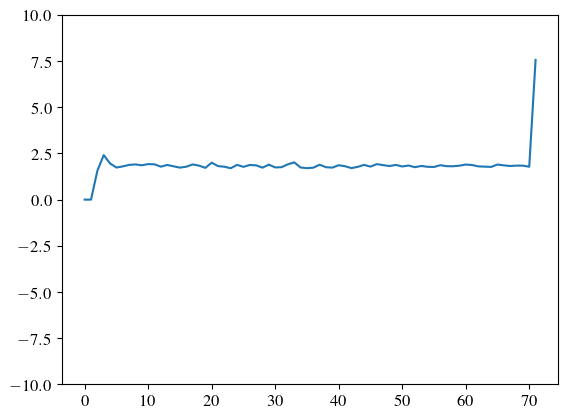

In [6]:
axlim = 10
fig, ax = plt.subplots()
(pentzer_df.ICRyL - pentzer_df.ICRyR).plot(ax=ax)
ax.set_ylim(bottom=-axlim, top=axlim)

<AxesSubplot: >

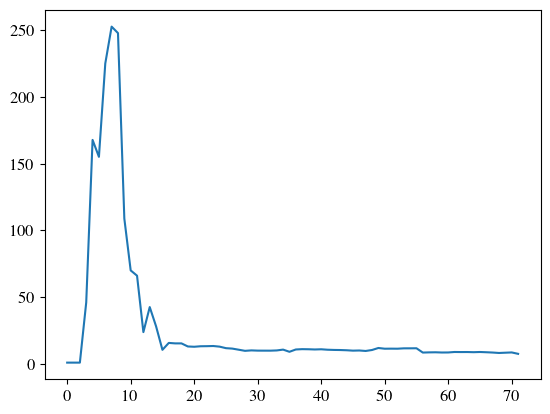

In [7]:
pentzer_df.B_sym.plot()


In [8]:
mask = pentzer_df.index >= 10

index = pentzer_df.index[mask]
power = pentzer_df.P_total[mask]

mu_asym = pentzer_df.m_asym[mask]
G_asym = pentzer_df.G_asym[mask]
B_asym = pentzer_df.B_asym[mask]

mu_sym = pentzer_df.m_sym[mask]
G_sym = pentzer_df.G_sym[mask]
B_sym = pentzer_df.B_sym[mask]


In [9]:
basename = u.get_basename(u.get_filename(abbr))
figdir = u.get_figdir(basename)
ssmrkgifs = figdir / "ssmrk"
# pentzfigs = ssmrkgifs / "ssmr_pentz"

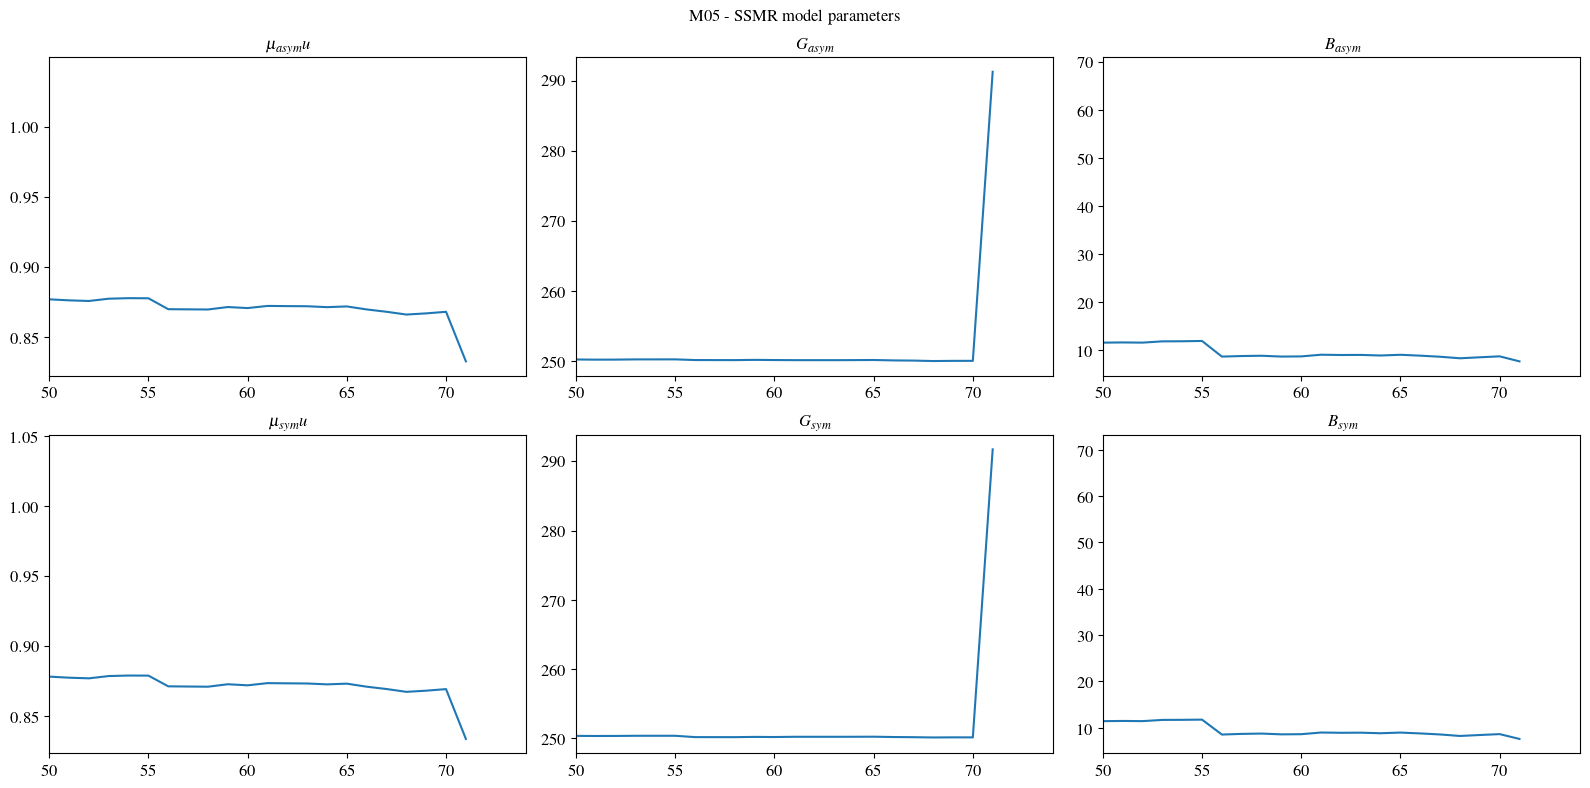

In [10]:
fig, subfigs = plt.subplots(ncols=3, nrows=2, figsize = (16,8))
cols = ("m_asym", "G_asym", "B_asym", "m_sym", "G_sym", "B_sym")

for col, ax in zip(cols, subfigs.reshape(-1)):
    pentzer_df[mask][col].plot(ax=ax)
    if col.startswith("m_"):
        title_txt = f"\{col.replace('m', 'mu')}"
    else:
        title_txt = col
    title_txt = title_txt.replace("_asym", "_{{asym}}")
    title_txt = title_txt.replace("_sym", "_{{sym}}")

    # if "G_" in col:
    #     ax.set_ylim((-0.5, 0.5))
    # if "m_" in col:
    #     ax.set_ylim((-1, 1))

    ax.set_xlim(left=50)

    ax.set_title(f"${title_txt}$")

fig.suptitle(f"{abbr} - SSMR model parameters")
fig.tight_layout()
fig.savefig(ssmrkgifs / f"{abbr}_ssmrk_params.jpg", bbox_inches="tight")


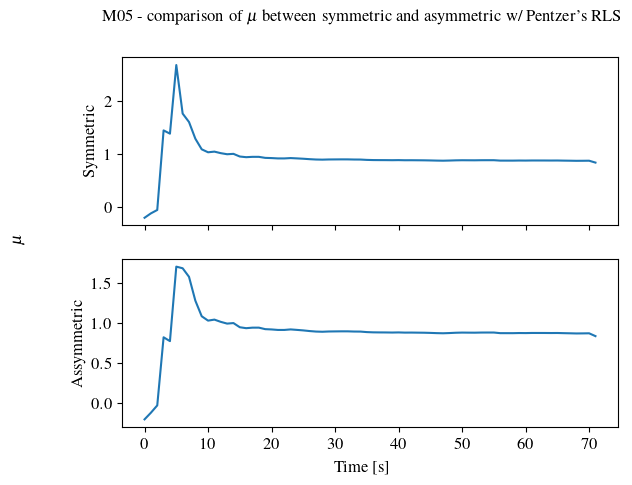

In [11]:
fig, [ax1, ax2] = plt.subplots(sharex=True, nrows=2)
pentzer_df.m_sym.plot(ax=ax1)
pentzer_df.m_asym.plot(ax=ax2)
ax1.set_ylabel("Symmetric")
ax2.set_ylabel("Assymmetric")
# ax1.set_ylim((0,2))
# ax2.set_ylim((0,2))
# ax1.set_xlim(left=0)
fig.supylabel("$\mu$", x=-0.05)
fig.supxlabel("Time [s]")
fig.suptitle(f"{abbr} - comparison of $\mu$ between symmetric and asymmetric w/ Pentzer's RLS")

fig.savefig(ssmrkgifs / f"{abbr}_pentz_m.jpg", bbox_inches="tight")

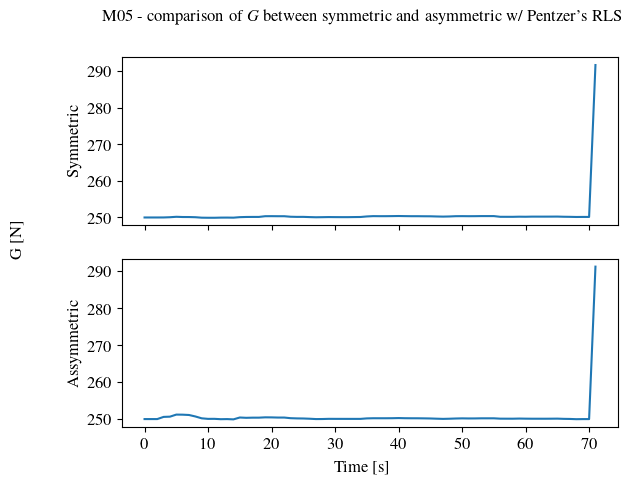

In [12]:
fig, [ax1, ax2] = plt.subplots(sharex=True, nrows=2)
pentzer_df.G_sym.plot(ax=ax1)
pentzer_df.G_asym.plot(ax=ax2)
ax1.set_ylabel("Symmetric")
ax2.set_ylabel("Assymmetric")
# ax1.set_xlim(left=0)
fig.supylabel("G [N]", x=-0.05)
fig.supxlabel("Time [s]")
fig.suptitle(f"{abbr} - comparison of $G$ between symmetric and asymmetric w/ Pentzer's RLS")

fig.savefig(ssmrkgifs / f"{abbr}_pentz_G.jpg", bbox_inches="tight")

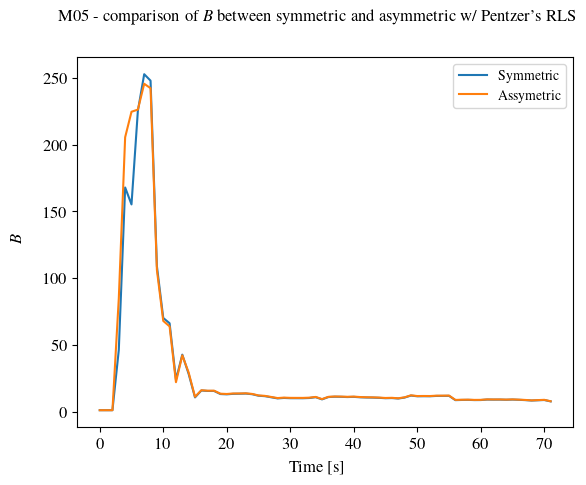

In [13]:
fig, ax = plt.subplots()
pentzer_df.B_sym.plot(ax=ax, label="Symmetric")
pentzer_df.B_asym.plot(ax=ax, label="Assymetric")
# ax.set_ylim((-2,4))
ax.legend()
# ax1.set_xlim(left=0)
fig.supylabel("$B$")
fig.supxlabel("Time [s]")

fig.suptitle(f"{abbr} - comparison of $B$ between symmetric and asymmetric w/ Pentzer's RLS")

fig.savefig(ssmrkgifs / f"{abbr}_pentz_B.jpg", bbox_inches="tight")

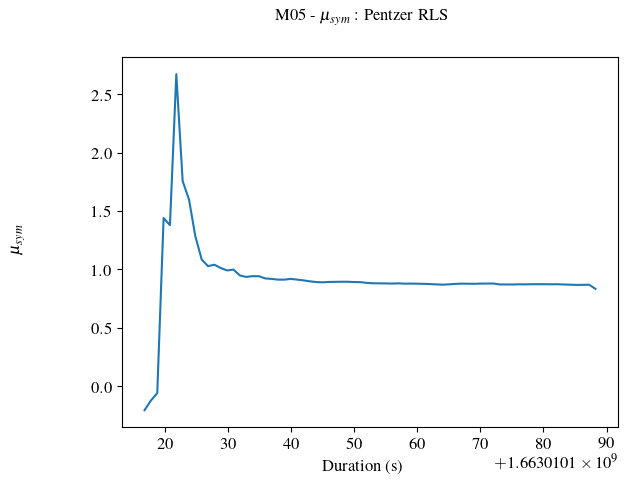

In [14]:
fig, ax1 = plt.subplots()
ax1.plot(pentzer_df.time, pentzer_df.m_sym)
# ax1.set_ylim((-3,3))
fig.supylabel("$\mu_{sym}$", x=-0.05)
fig.supxlabel("Duration (s)")
fig.suptitle(f"{abbr} - $\mu_{{sym}}$ : Pentzer RLS")

fig.savefig(ssmrkgifs / f"{abbr}_m_sym.jpg", bbox_inches="tight")

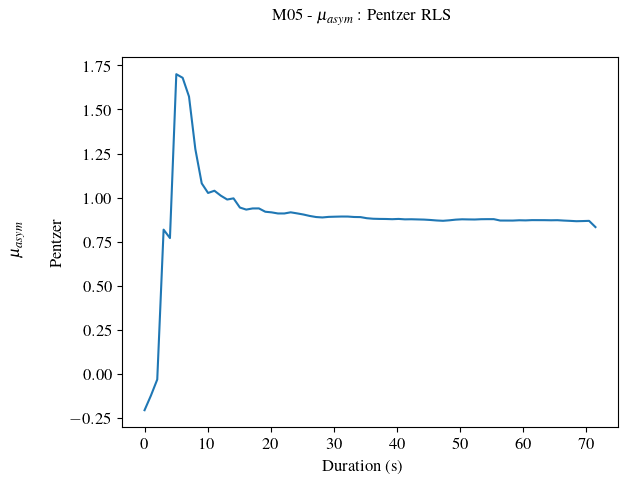

In [15]:
fig, ax1 = plt.subplots()
ax1.plot(pentzer_df.time_rel, pentzer_df.m_asym)
ax1.set_ylabel("Pentzer")
# ax1.set_ylim((-6,2))
fig.supylabel("$\mu_{asym}$", x=-0.05)
fig.supxlabel("Duration (s)")
fig.suptitle(f"{abbr} - $\mu_{{asym}}$ : Pentzer RLS")

fig.savefig(ssmrkgifs / f"{abbr}_m_asym.jpg", bbox_inches="tight")

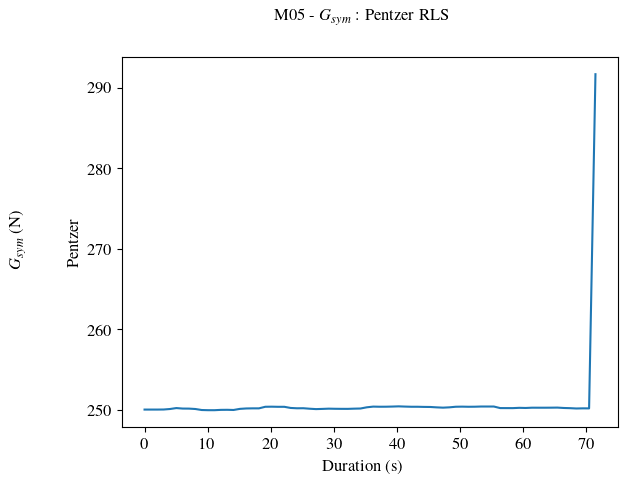

In [16]:
fig, ax1 = plt.subplots()
ax1.plot(pentzer_df.time_rel, pentzer_df.G_sym)
ax1.set_ylabel("Pentzer")
fig.supylabel("$G_{sym}$ (N)", x=-0.05)
fig.supxlabel("Duration (s)")
fig.suptitle(f"{abbr} - $G_{{sym}}$ : Pentzer RLS")

fig.savefig(ssmrkgifs / f"{abbr}_G_sym.jpg", bbox_inches="tight")

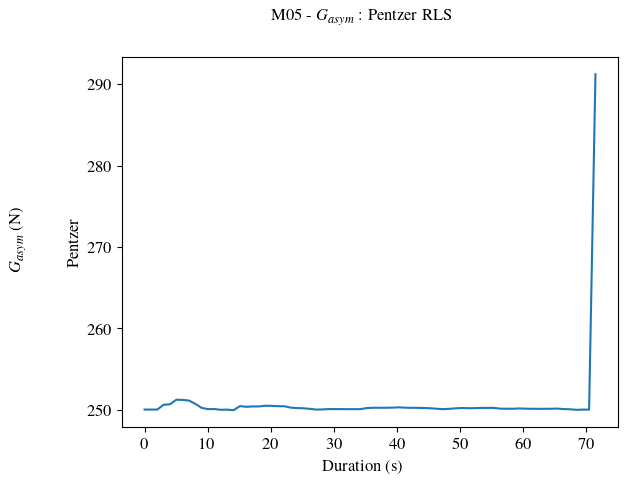

In [17]:
fig, ax1 = plt.subplots()
ax1.plot(pentzer_df.time_rel, pentzer_df.G_asym)
ax1.set_ylabel("Pentzer")
# ax1.set_ylim((0,20000))
fig.supylabel("$G_{asym}$ (N)", x=-0.05)
fig.supxlabel("Duration (s)")
fig.suptitle(f"{abbr} - $G_{{asym}}$ : Pentzer RLS")

fig.savefig(ssmrkgifs / f"{abbr}_G_asym.jpg", bbox_inches="tight")

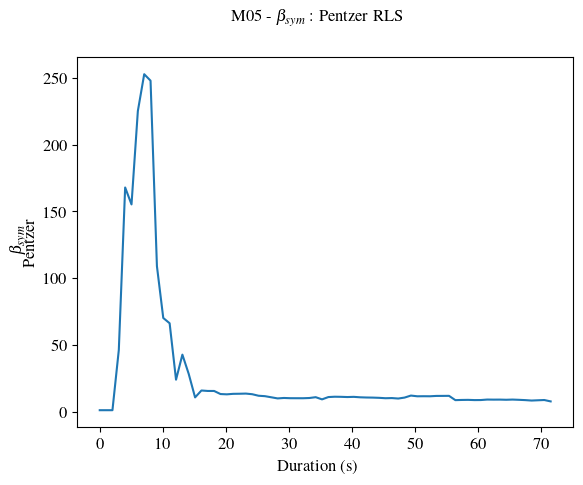

In [18]:
fig, ax1 = plt.subplots()
ax1.plot(pentzer_df.time_rel, pentzer_df.B_sym)
ax1.set_ylabel("Pentzer")
# ax2.set_ylim((-6,2))
fig.supylabel("$\\beta_{sym}$")
fig.supxlabel("Duration (s)")
fig.suptitle(f"{abbr} - $\\beta_{{sym}}$ : Pentzer RLS")

fig.savefig(ssmrkgifs / f"{abbr}_B_sym.jpg", bbox_inches="tight")

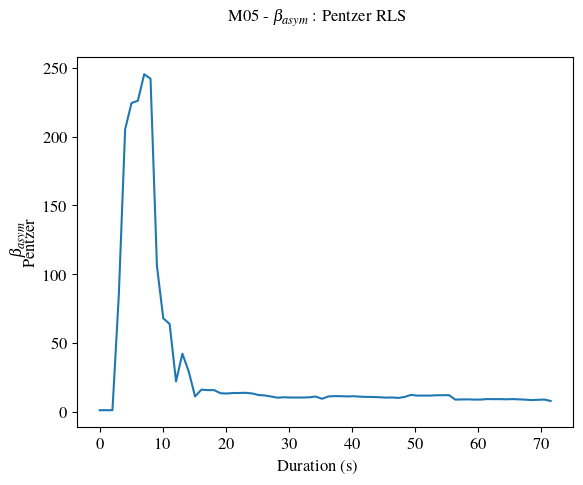

In [19]:
fig, ax1= plt.subplots()
ax1.plot(pentzer_df.time_rel, pentzer_df.B_asym)
ax1.set_ylabel("Pentzer")
# ax1.set_ylim((-2,2))
fig.supylabel("$\\beta_{asym}$")
fig.supxlabel("Duration (s)")
fig.suptitle(f"{abbr} - $\\beta_{{asym}}$ : Pentzer RLS")

fig.savefig(ssmrkgifs / f"{abbr}_B_asym.jpg", bbox_inches="tight")

/tmp/ipykernel_408216/1304015329.py:15: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cb = fig.colorbar(scmap, orientation="horizontal", pad=0.2);


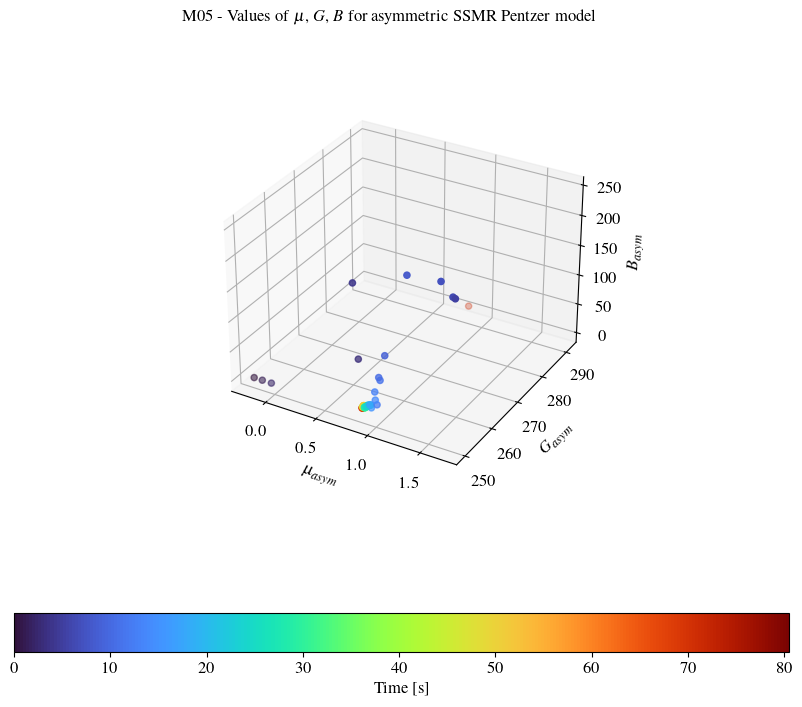

In [20]:
cm = plt.get_cmap("turbo")
cnorm = mpl.colors.Normalize(vmin=min(pentzer_df.time_rel), vmax=max(pentzer_df.time_rel))
scmap = mpl.cm.ScalarMappable(norm=cnorm, cmap=cm)

fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(projection="3d")

ax.scatter(pentzer_df.m_asym, pentzer_df.G_asym, pentzer_df.B_asym, c=scmap.to_rgba(pentzer_df.time_rel))
# ax.set_xlim((-100, 100))
# ax.set_ylim((-10000, 10000))
# ax.set_zlim((-1000, 1000))
ax.set_xlabel("${\mu}_{asym}$")
ax.set_ylabel("${G}_{asym}$")
ax.set_zlabel("${B}_{asym}$")
cb = fig.colorbar(scmap, orientation="horizontal", pad=0.2);
cb.ax.set_xlabel("Time [s]");

fig.suptitle(f"{abbr} - Values of $\mu$, $G$, $B$ for asymmetric SSMR Pentzer model");

/tmp/ipykernel_408216/2839314065.py:20: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cb = fig.colorbar(scmap, orientation="horizontal", pad=0.2);


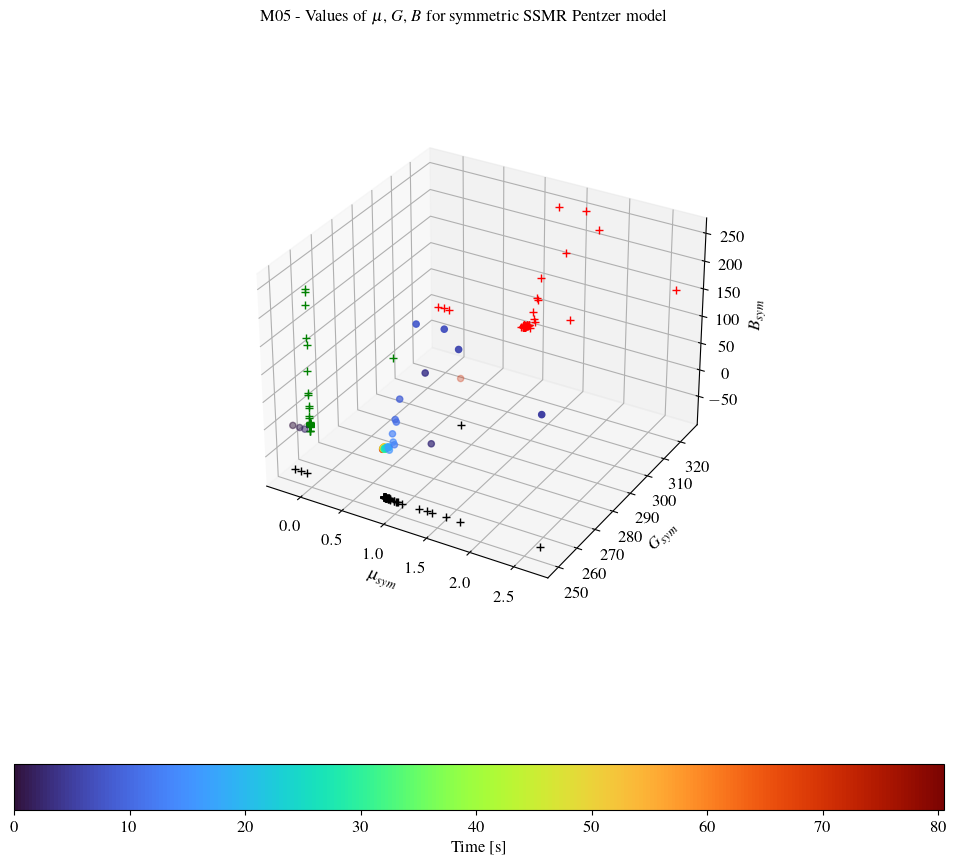

In [21]:
cm = plt.get_cmap("turbo")
cnorm = mpl.colors.Normalize(vmin=min(pentzer_df.time_rel), vmax=max(pentzer_df.time_rel))
scmap = mpl.cm.ScalarMappable(norm=cnorm, cmap=cm)

fig = plt.figure(figsize=(12,10))
ax = fig.add_subplot(projection="3d")

ax.scatter(pentzer_df.m_sym, pentzer_df.G_sym, pentzer_df.B_sym, c=scmap.to_rgba(pentzer_df.time_rel))
# ax.set_xlim((0, 1))
# ax.set_ylim((-50, 250))
# ax.set_zlim((-1000, 1000))

ax.plot(pentzer_df.m_sym, pentzer_df.B_sym, "r+", zdir="y", zs=325)
ax.plot(pentzer_df.G_sym, pentzer_df.B_sym, "g+", zdir="x", zs=0)
ax.plot(pentzer_df.m_sym, pentzer_df.G_sym, "k+", zdir="z", zs=-80)

ax.set_xlabel("${\mu}_{sym}$")
ax.set_ylabel("${G}_{sym}$")
ax.set_zlabel("${B}_{sym}$")
cb = fig.colorbar(scmap, orientation="horizontal", pad=0.2);
cb.ax.set_xlabel("Time [s]");

fig.suptitle(f"{abbr} - Values of $\mu$, $G$, $B$ for symmetric SSMR Pentzer model");

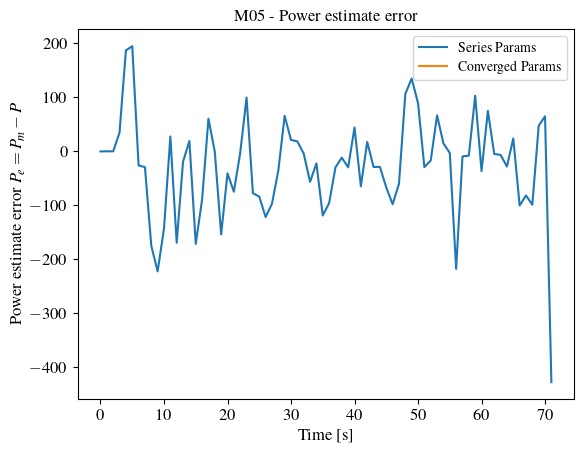

In [22]:
fig, ax = plt.subplots()
pentzer_df.P_err_t.plot(ax=ax, label="Series Params")
pentzer_df.P_err_conv.plot(ax=ax, label="Converged Params")
ax.legend()
ax.set_ylabel("Power estimate error $P_e=P_m - P$")
ax.set_xlabel("Time [s]")
ax.set_title(f"{abbr} - Power estimate error")
fig.savefig(ssmrkgifs / f"{abbr}_Perror.jpg", bbox_inches="tight")

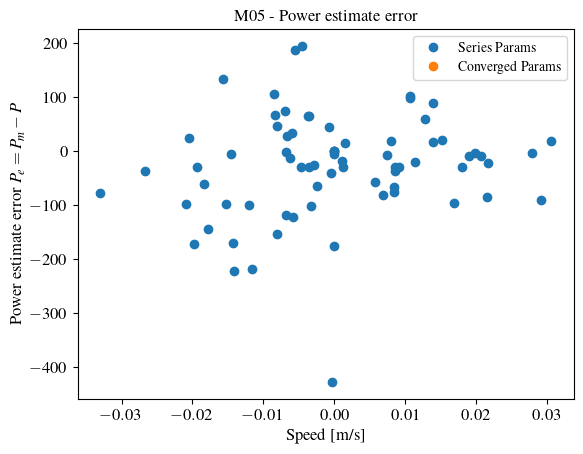

In [23]:
fig, ax = plt.subplots()
ax.plot(pentzer_df.vx, pentzer_df.P_err_t, "o", label="Series Params")
ax.plot(pentzer_df.vx, pentzer_df.P_err_conv, "o", label="Converged Params")
ax.legend()
ax.set_ylabel("Power estimate error $P_e=P_m - P$")
ax.set_xlabel("Speed [m/s]")
ax.set_title(f"{abbr} - Power estimate error")
fig.savefig(ssmrkgifs / f"{abbr}_Perror_vx.jpg", bbox_inches="tight")

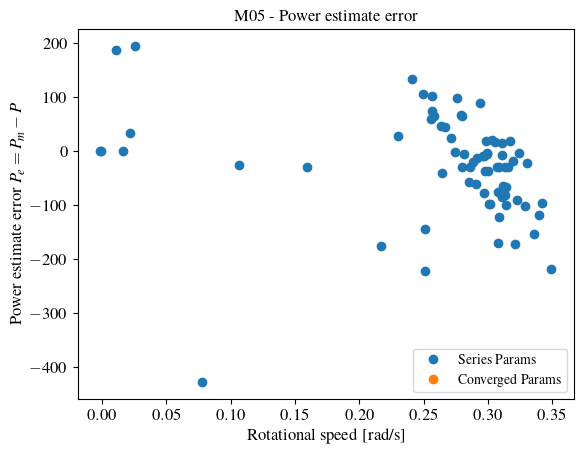

In [24]:
fig, ax = plt.subplots()
ax.plot(pentzer_df.w_z, pentzer_df.P_err_t, "o", label="Series Params")
ax.plot(pentzer_df.w_z, pentzer_df.P_err_conv, "o", label="Converged Params")
ax.legend()
ax.set_ylabel("Power estimate error $P_e=P_m - P$")
ax.set_xlabel("Rotational speed [rad/s]")
ax.set_title(f"{abbr} - Power estimate error")
fig.savefig(ssmrkgifs / f"{abbr}_Perror_wz.jpg", bbox_inches="tight")

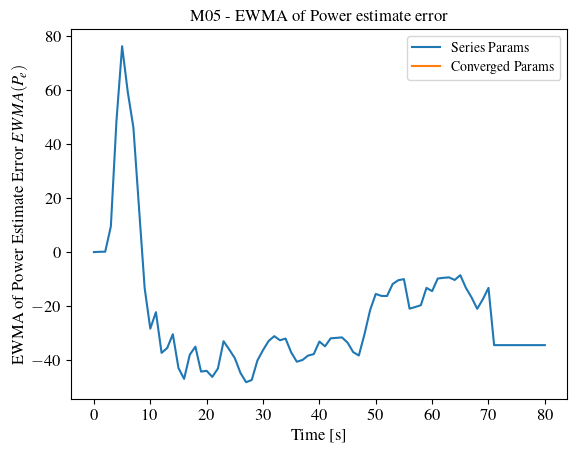

In [25]:
fig, ax = plt.subplots()
pentzer_df.EWMA_t.plot(ax=ax, label="Series Params")
pentzer_df.EWMA_conv.plot(ax=ax, label="Converged Params")
ax.legend()
ax.set_ylabel("EWMA of Power Estimate Error $EWMA(P_e)$")
ax.set_xlabel("Time [s]")
ax.set_title(f"{abbr} - EWMA of Power estimate error")
fig.savefig(ssmrkgifs / f"{abbr}_PEWMA.jpg", bbox_inches="tight")

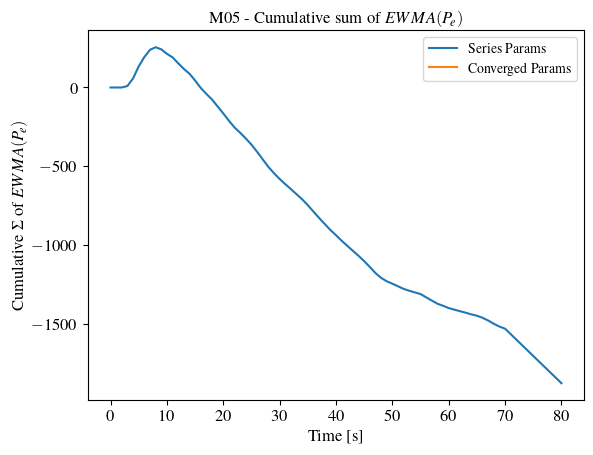

In [26]:
fig, ax = plt.subplots()
pentzer_df.estimator_t.plot(ax=ax, label="Series Params")
pentzer_df.estimator_conv.plot(ax=ax, label="Converged Params")
ax.legend()
ax.set_ylabel("Cumulative $\Sigma$ of $EWMA(P_e)$")
ax.set_xlabel("Time [s]")
ax.set_title(f"{abbr} - Cumulative sum of $EWMA(P_e)$")
fig.savefig(ssmrkgifs / f"{abbr}_PEstimator.jpg", bbox_inches="tight")


In [27]:
from scipy import integrate
import pandas as pd

pentzer_df.index = pd.RangeIndex(len(pentzer_df.index))
pentzer_df["time_rel"] = pentzer_df["time"] - pentzer_df["time"][0]

power = pentzer_df["P_total"]
rel_time = pentzer_df["time_rel"]
pentzer_df["energy_ws"] = integrate.cumulative_trapezoid(power, rel_time, initial=0)
pentzer_df["energy_wh"] = pentzer_df["energy_ws"] / 3600

<AxesSubplot: >

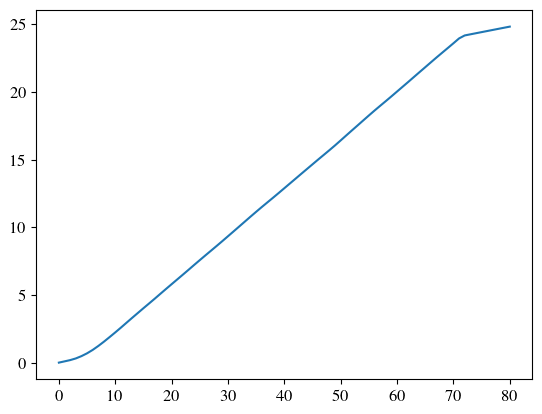

In [28]:
pentzer_df.energy_wh.plot()

Text(0.5, 0.01, 'Time [s]')

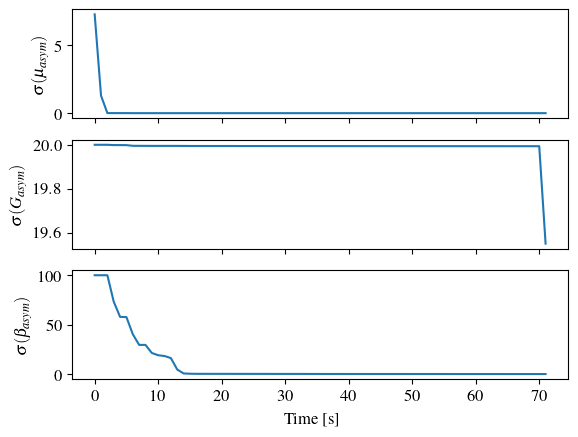

In [29]:
fig, (ax1, ax2, ax3) = plt.subplots(sharex=True, nrows=3)
pentzer_df.covm_asym.plot(ax=ax1)
pentzer_df.covG_asym.plot(ax=ax2)
pentzer_df.covB_asym.plot(ax=ax3)

ax1.set_ylabel("$\sigma({\mu}_{asym})$")
ax2.set_ylabel("$\sigma({G}_{asym})$")
ax3.set_ylabel("$\sigma({\\beta}_{asym})$")

fig.supxlabel("Time [s]")


Text(0.5, 0.01, 'Time [s]')

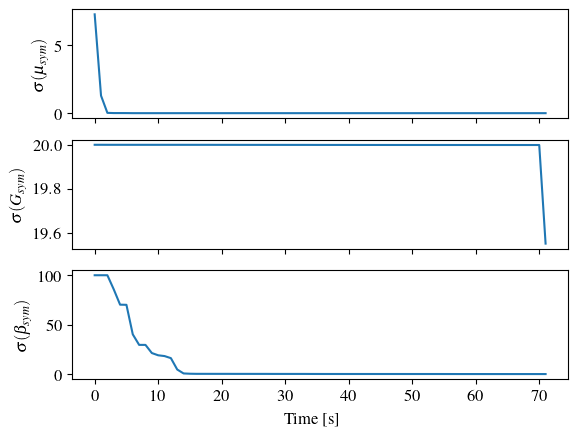

In [30]:
fig, (ax1, ax2, ax3) = plt.subplots(sharex=True, nrows=3)
pentzer_df.covm_sym.plot(ax=ax1)
pentzer_df.covG_sym.plot(ax=ax2)
pentzer_df.covB_sym.plot(ax=ax3)

ax1.set_ylabel("$\sigma({\mu}_{sym})$")
ax2.set_ylabel("$\sigma({G}_{sym})$")
ax3.set_ylabel("$\sigma({\\beta}_{sym})$")

fig.supxlabel("Time [s]")

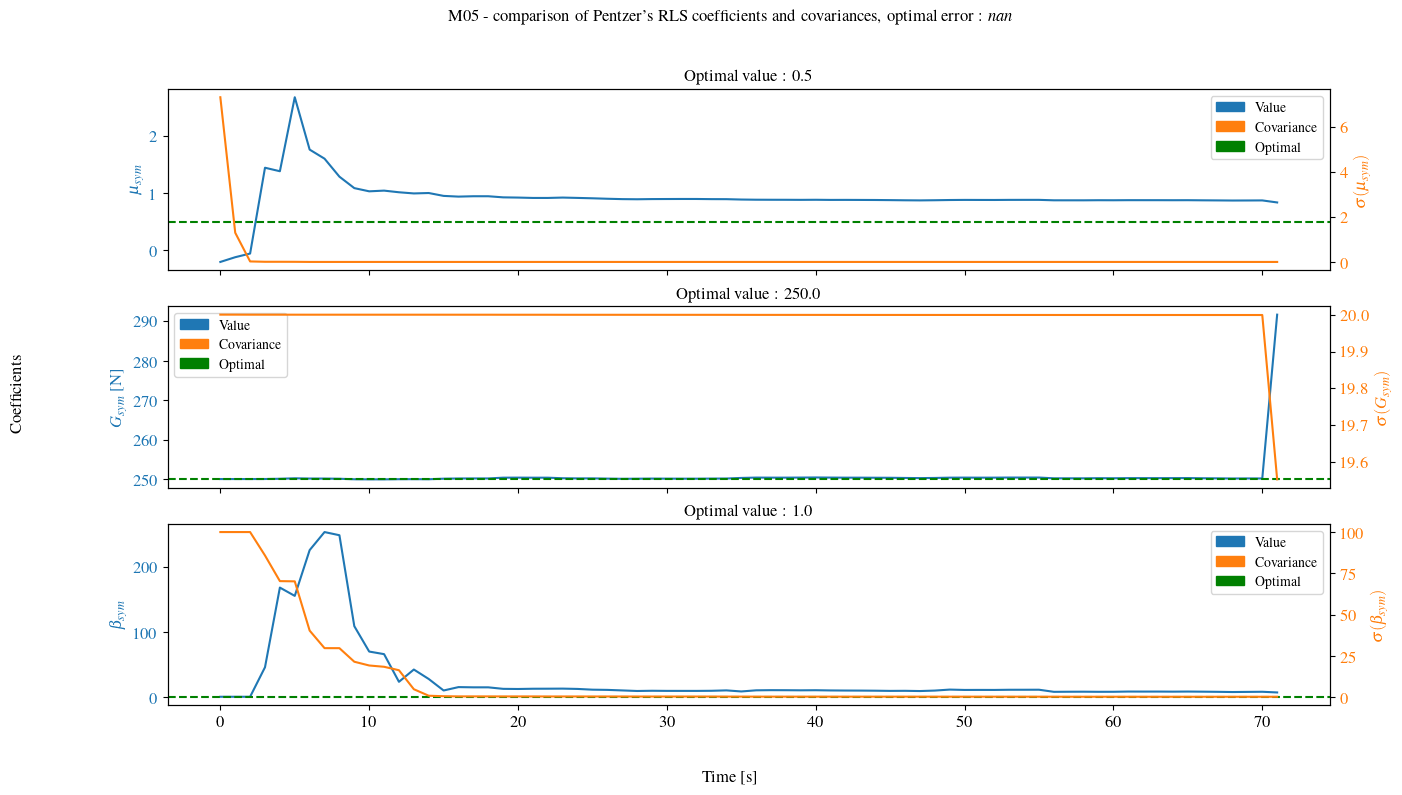

In [31]:
import matplotlib.patches as mpatches

fig_colors = {"C0": "Value", "C1": "Covariance", "g": "Optimal"}
legend_handles = [mpatches.Patch(color=col, label=lab) for col, lab in fig_colors.items()]

fig, [ax1, ax2, ax3] = plt.subplots(nrows=3, sharex=True, figsize=(15, 8))
pentzer_df.m_sym.plot(ax=ax1, label="Value", color="C0")
pentzer_df.G_sym.plot(ax=ax2, label="Value", color="C0")
pentzer_df.B_sym.plot(ax=ax3, label="Value", color="C0")

ax1.axhline(y=optimal["mu"], color="g", linestyle="--", label="Optimal")
ax2.axhline(y=optimal["G"], color="g", linestyle="--", label="Optimal")
ax3.axhline(y=optimal["beta"], color="g", linestyle="--", label="Optimal")

ax1_twin = ax1.twinx()
ax2_twin = ax2.twinx()
ax3_twin = ax3.twinx()

pentzer_df.covm_sym.plot(ax=ax1_twin, label="Covariance", color="C1")
pentzer_df.covG_sym.plot(ax=ax2_twin, label="Covariance", color="C1")
pentzer_df.covB_sym.plot(ax=ax3_twin, label="Covariance", color="C1")

ax1.set_ylabel("${\mu}_{sym}$", color="C0")
ax2.set_ylabel("$G_{sym}$ [N]", color="C0")
ax3.set_ylabel("${\\beta}_{sym}$", color="C0")

ax1_twin.set_ylabel("${\sigma}({\mu}_{sym})$", color="C1")
ax2_twin.set_ylabel("${\sigma}({G}_{sym})$", color="C1")
ax3_twin.set_ylabel("${\sigma}({\\beta}_{sym})$", color="C1")

ax1.tick_params(axis='y', labelcolor="C0")
ax2.tick_params(axis='y', labelcolor="C0")
ax3.tick_params(axis='y', labelcolor="C0")

ax1_twin.tick_params(axis='y', labelcolor="C1")
ax2_twin.tick_params(axis='y', labelcolor="C1")
ax3_twin.tick_params(axis='y', labelcolor="C1")

ax1.legend(handles=legend_handles)
ax2.legend(handles=legend_handles)
ax3.legend(handles=legend_handles)

ax1.set_title(f"Optimal value : {optimal['mu']}")
ax2.set_title(f"Optimal value : {optimal['G']}")
ax3.set_title(f"Optimal value : {optimal['beta']}")

fig.supylabel("Coefficients")
fig.supxlabel("Time [s]")

optimal_err = optimal["err"]
fig.suptitle(f"{abbr} - comparison of Pentzer's RLS coefficients and covariances, optimal error : ${optimal_err}$")

fig.savefig(ssmrkgifs / f"{abbr}_covariance-coefficients.jpg", bbox_inches="tight")